<a href="https://colab.research.google.com/github/alejoherrera/DIFIR_publico/blob/main/deteccion_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alejandro Herrera:



# 1.)Preparación del modelo y librerías

In [1]:
%%capture
!pip install mxnet-cu112
!pip install gluoncv

In [2]:
%%capture

import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv as gcv
import hashlib
from pylab import rcParams
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
import numpy as np
import os
from pathlib import Path
import pandas as pd

rcParams['figure.figsize'] = 5, 10

In [3]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True,ctx=mx.gpu(0))

100%|██████████| 224190/224190 [00:08<00:00, 26721.93KB/s]


In [4]:
network.reset_class(classes=['truck', 'person','car',"motorcycle"], reuse_weights=['truck', 'person',"car","motorcycle"])

#2.)Parámetros de detección


In [5]:
#@title Objetos a ubicar en la imagen
objetos = "car" #@param ["truck", "person","car","motorcycle","todos"]
print('Buscar', objetos)

Buscar car


In [6]:

if objetos != "todos":
  objeto=[objetos]
else:
  objeto=['truck', 'person','car',"motorcycle"]


In [7]:
#@title Probabilidad mínima de que sea el objeto
#@markdown Los modelos de reconocimiento establecen una probabilidad que el objeto
#@markdown detectado corresponda a la etiqueta, favor especificarla


probabilidad= 60 #@param {type:"slider", min:30, max:90, step:1}
print("Probabilidad mínima",probabilidad)

Probabilidad mínima 60


In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
from os import walk
path="/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales"
imgs =next(walk(path), (None, None, []))[2]

In [10]:
imgs[0]

'frame8201.jpg'

In [11]:
def load_image(filepath):
    
    im=image.imread(filepath)
    return im
    

In [22]:
def transform_image(array):
    norm_image,image=data.transforms.presets.yolo.transform_test(array)
    norm_image= norm_image.as_in_context(mx.gpu(0))
    return norm_image,image

In [13]:
def detect(network, data):
    pred=network(data)
    class_ids,scores,bounding_boxes=pred
    return class_ids, scores, bounding_boxes

In [14]:
#im=load_image(inicial)
#im=transform_image(im)

In [15]:
#class_ids, scores, bounding_boxes =detect(network,im)

In [16]:
def count_object(network, class_ids, scores, bounding_boxes, object_label, threshold):
    idx=0
    for i in range(len(network.classes)):
        if network.classes[i]==object_label:
            idx=i
    scores=scores[0]
    class_ids=class_ids[0]
    num_object=0
    for i in range(len(scores)):
        proba=scores[i].astype('float32').asscalar()
        if proba>threshold and class_ids[i].asscalar()==idx:
            num_object+=1
    return num_object

In [17]:
difir = Path(path)

In [18]:
Difir1=[]
Difir1=pd.DataFrame(Difir1,columns=("camara", "latitud", "longitud","proyecto","etiqueta","probabilidad","cantidad_detectada","anio","mes","dia","hora","minuto","archivo"))

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8201.jpg


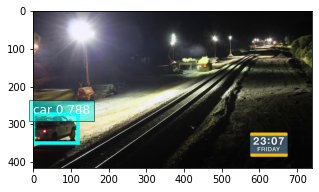

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8202.jpg


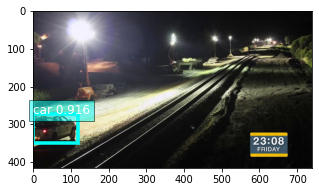

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8203.jpg


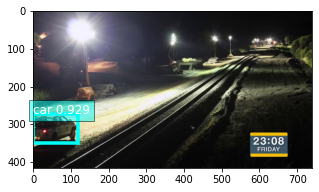

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8204.jpg


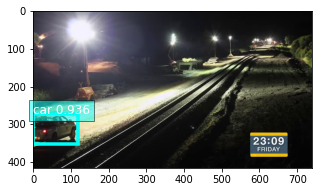

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8205.jpg


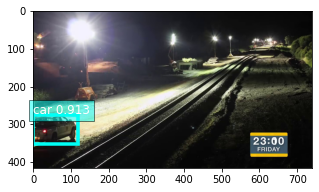

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8206.jpg


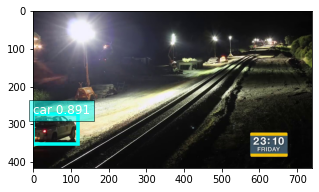

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8207.jpg


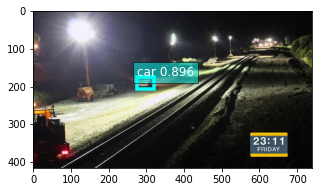

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8208.jpg


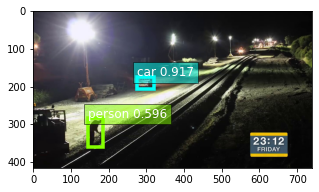

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8209.jpg


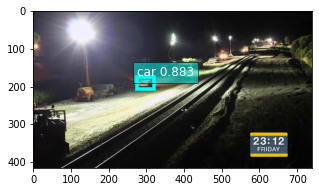

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8210.jpg


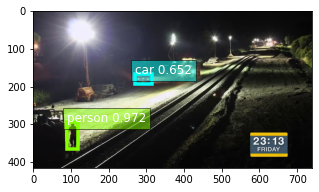

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8211.jpg


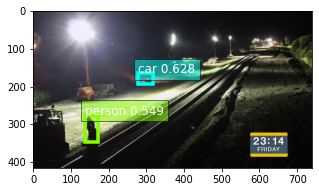

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8212.jpg


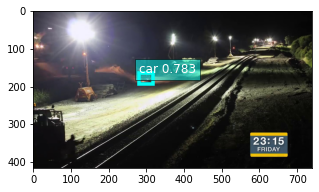

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8213.jpg


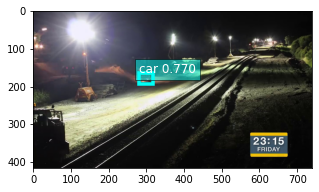

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8214.jpg


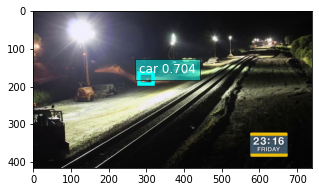

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8215.jpg


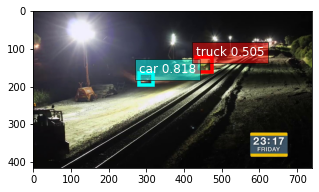

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8216.jpg


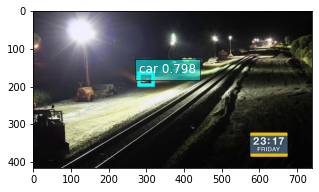

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8217.jpg


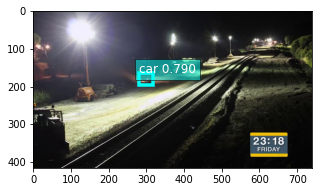

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8218.jpg


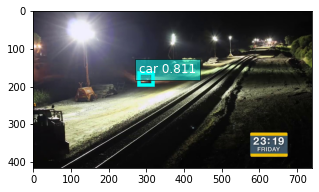

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8219.jpg


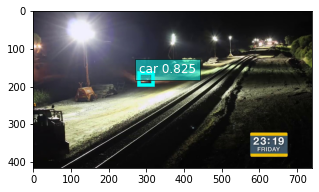

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8220.jpg


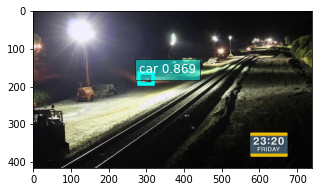

/content/drive/MyDrive/GIZ/Resultados/Frames_iniciales/frame8221.jpg


KeyboardInterrupt: ignored

In [23]:
for filepath in difir.glob('**/*.jpg'):
  print(filepath)
  im=load_image(filepath)
  #im=transform_image(im2)
  norm_image, unnorm_image=transform_image(im)
  file=str(filepath)
  threshold=probabilidad/100#0.6
  class_ids, scores, bounding_boxes =detect(network,norm_image)

 

  #for object_label in ["truck","person","car"]:
  for object_label in objeto:
 
    count = count_object(network, class_ids, scores, bounding_boxes, object_label,threshold)

    ax = utils.viz.plot_bbox(unnorm_image, bounding_boxes[0], scores[0], class_ids[0], class_names=network.classes)
    fig = plt.gcf()
    plt.show()

 

    Difir1.loc[len(Difir1)] = ["DIFIR1",9.9322,-84.10,"Prueba_GIZ",object_label,threshold,count,file[67:71],file[72:74],file[75:77],file[78:80],file[81:83],file]
    #print("{} objects of class '{}' detected".format(count, object_label))

In [ ]:
Difir1

,camara,latitud,longitud,proyecto,etiqueta,probabilidad,cantidad_detectada,anio,mes,dia,hora,minuto,archivo
0,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
1,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
2,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
3,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
4,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
69,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
70,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...
71,DIFIR1,9.9322,-84.1,Prueba_GIZ,person,0.6,0,g,,,,,/content/drive/MyDrive/GIZ/Resultados/Frames_i...


In [ ]:
Difir1.to_excel("DIFIR.xlsx")